In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('preprocessed_data.csv')

### First Attempt of Summary Statistics

In [ ]:
# 1. Quick Summary Statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       monthly_rent  monthly_aconto  move_in_price     size_sqm        rooms  \
count  1.897000e+03     1897.000000   1.897000e+03  1897.000000  1897.000000   
mean   2.520094e+04     3655.044280   1.466363e+05    76.227728     2.548761   
std    1.283260e+05    16633.153629   7.738691e+05    41.518307     1.221239   
min    3.127000e+03        0.000000   0.000000e+00     6.000000     1.000000   
25%    9.750000e+03      505.000000   4.155000e+04    43.000000     1.000000   
50%    1.250000e+04      800.000000   6.070000e+04    80.000000     3.000000   
75%    1.550000e+04     1100.000000   7.622000e+04    98.000000     3.000000   
max    1.758802e+06   196000.000000   1.199687e+07   330.000000     8.000000   

             floor       deposit  prepaid_rent  
count  1897.000000  1.897000e+03  1.897000e+03  
mean      2.316816  6.675870e+04  2.560223e+04  
std       2.348646  3.524395e+05  1.661124e+05  
min       0.000000  0.000000e+00  0.000000e+00  
25%       1.00

In [ ]:
continuous_vars = df.select_dtypes(include=['number']).columns.tolist()
continuous_ratio_vars = df.select_dtypes(include=['float64']).columns.tolist()

In [ ]:
# 2. Correlation Matrix for the numerical variables
correlation_matrix = df[continuous_vars].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                monthly_rent  monthly_aconto  move_in_price  size_sqm  \
monthly_rent        1.000000        0.028329       0.842680  0.100363   
monthly_aconto      0.028329        1.000000       0.206881  0.214173   
move_in_price       0.842680        0.206881       1.000000  0.101833   
size_sqm            0.100363        0.214173       0.101833  1.000000   
rooms               0.106255        0.105710       0.091716  0.864300   
floor              -0.025075       -0.013392      -0.036943  0.058167   
deposit             0.936477        0.034984       0.806115  0.100945   
prepaid_rent        0.809929        0.022582       0.759790  0.083123   

                   rooms     floor   deposit  prepaid_rent  
monthly_rent    0.106255 -0.025075  0.936477      0.809929  
monthly_aconto  0.105710 -0.013392  0.034984      0.022582  
move_in_price   0.091716 -0.036943  0.806115      0.759790  
size_sqm        0.864300  0.058167  0.100945      0.083123  
rooms           

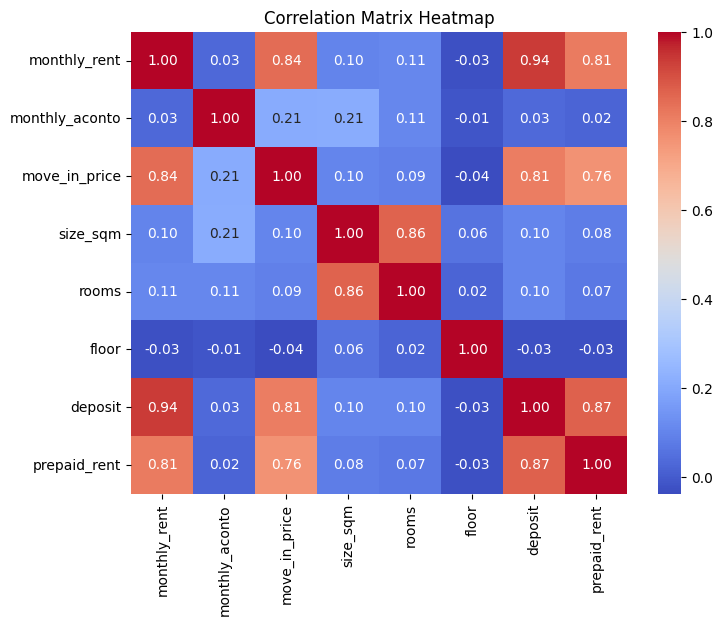

In [ ]:
# 3. Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

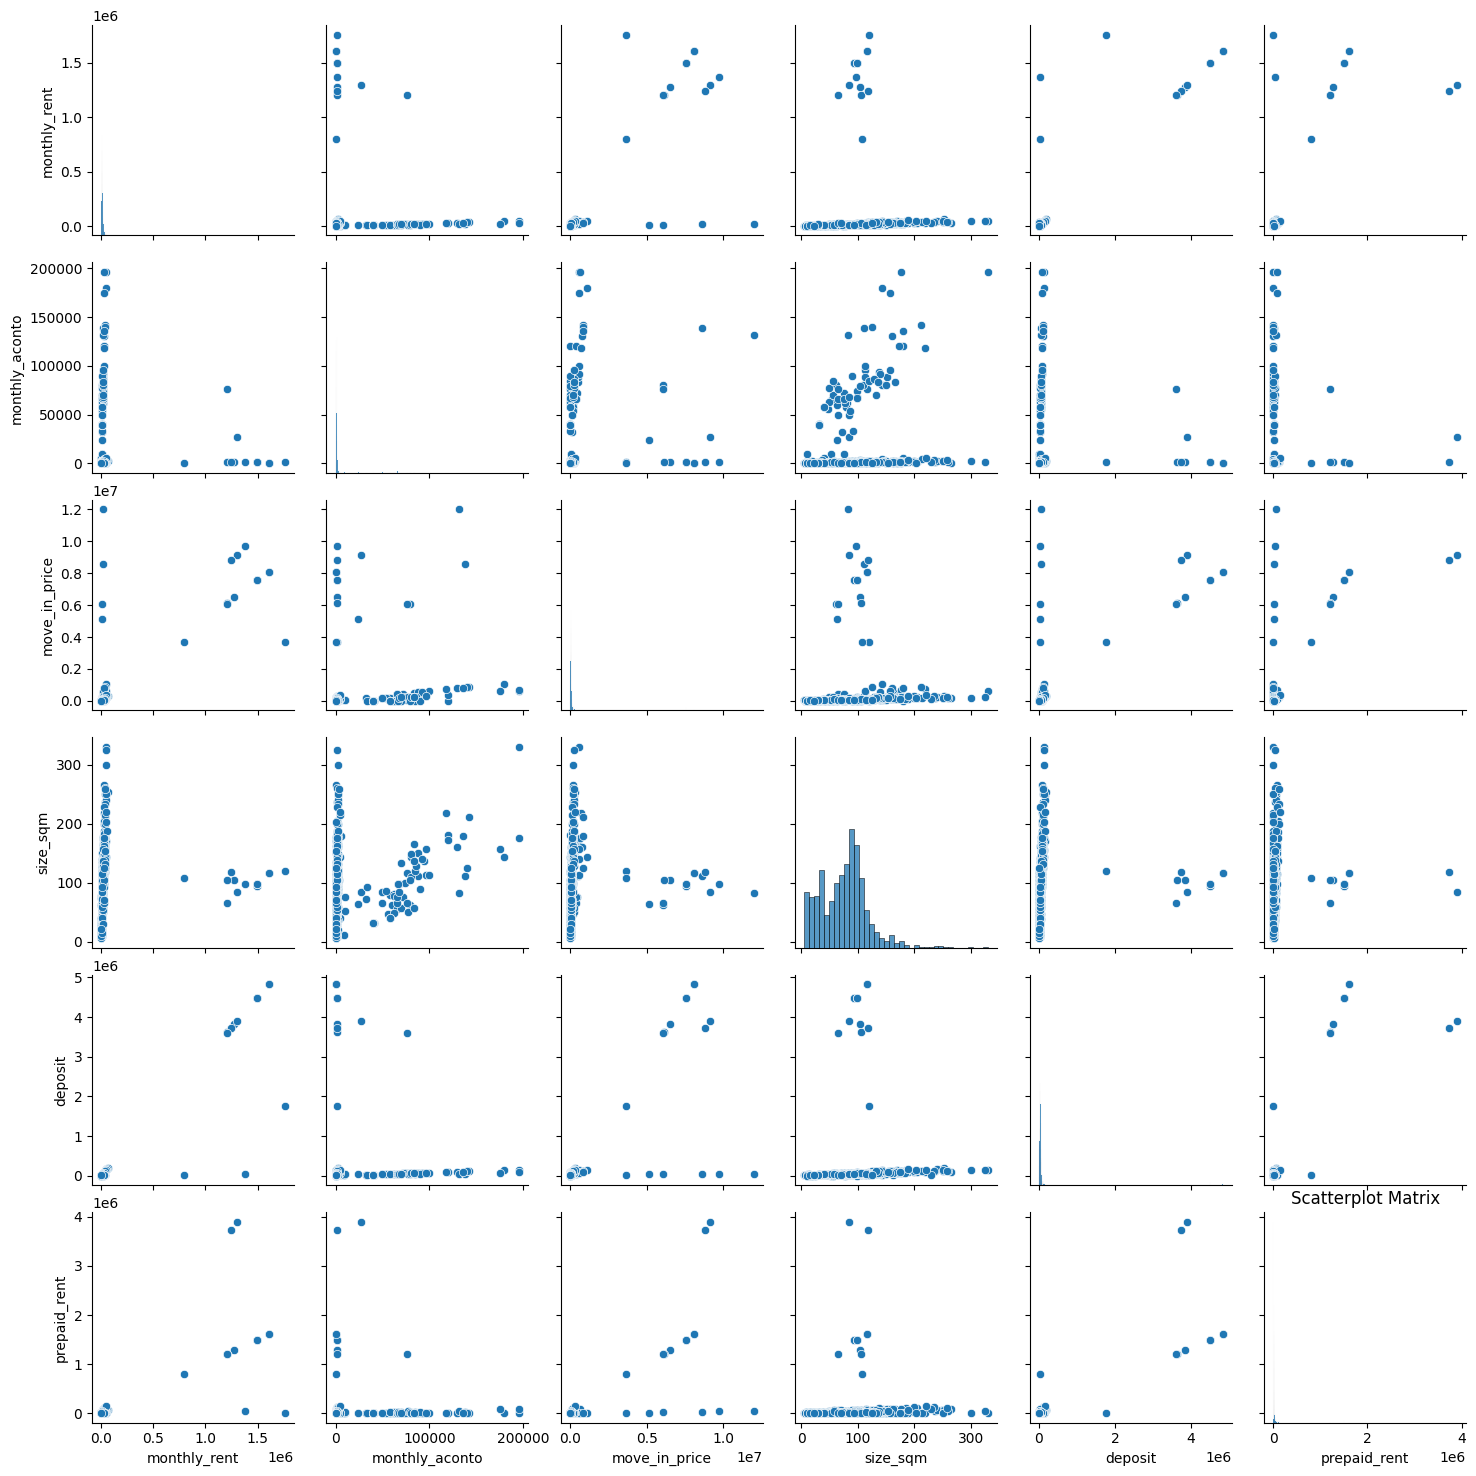

In [ ]:
# 4. Scatterplot Matrix with Histograms (only continuous ratio variables)
sns.pairplot(df[df.select_dtypes(include=['float64']).columns.tolist()])
plt.title('Scatterplot Matrix')
plt.show()

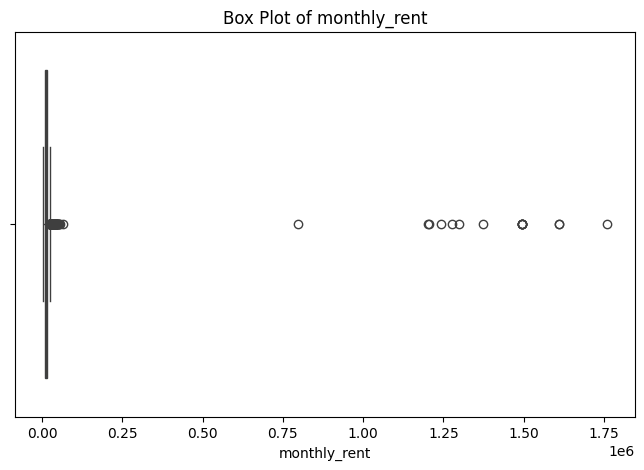

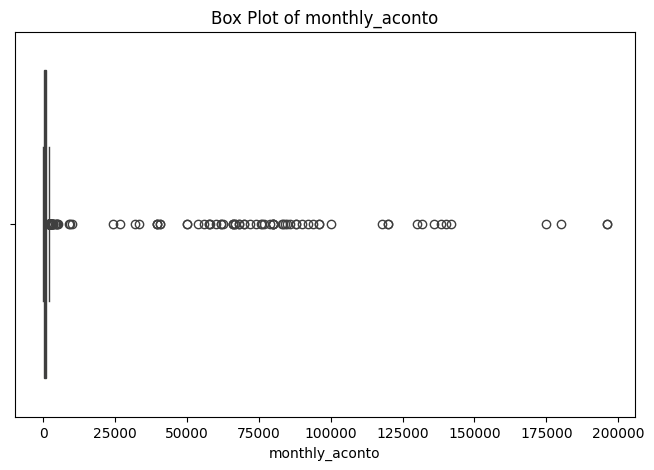

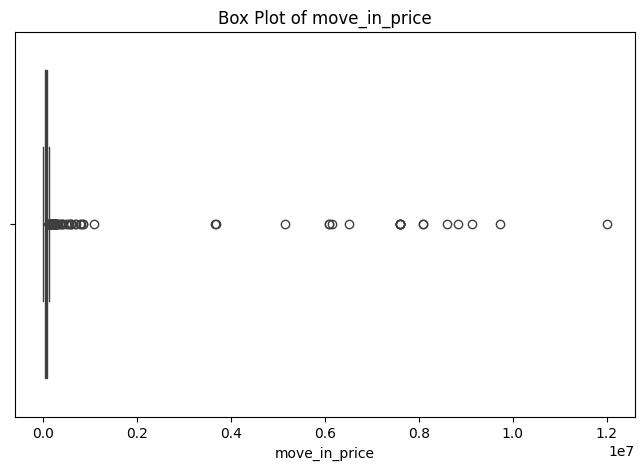

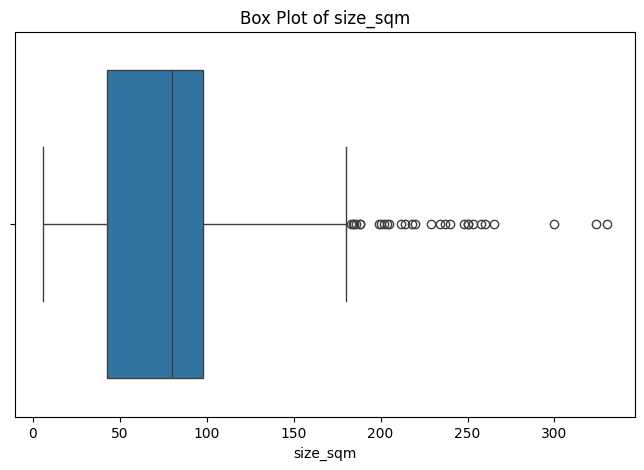

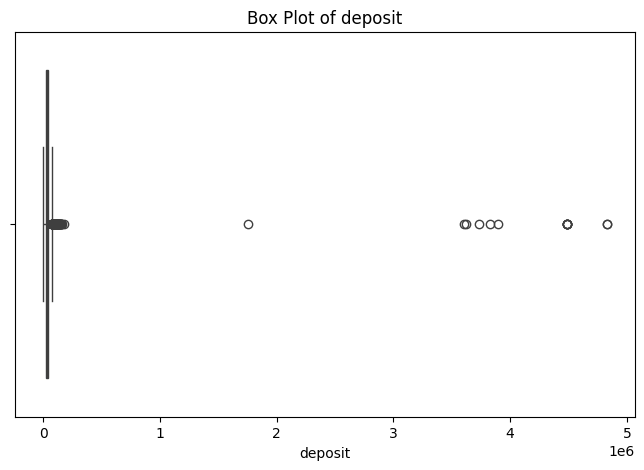

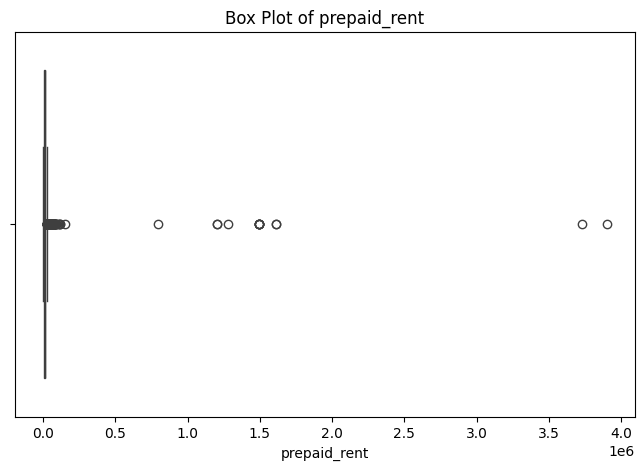

In [ ]:
for var in df.select_dtypes(include=['float64']).columns.tolist():
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[var])
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.show()

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_36277/756177244.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=var, data=df, ci=None, color='teal')


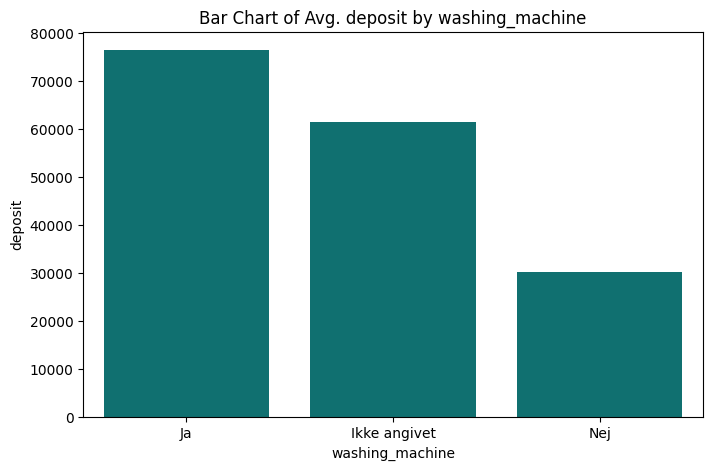

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_36277/756177244.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=var, data=df, ci=None, color='teal')


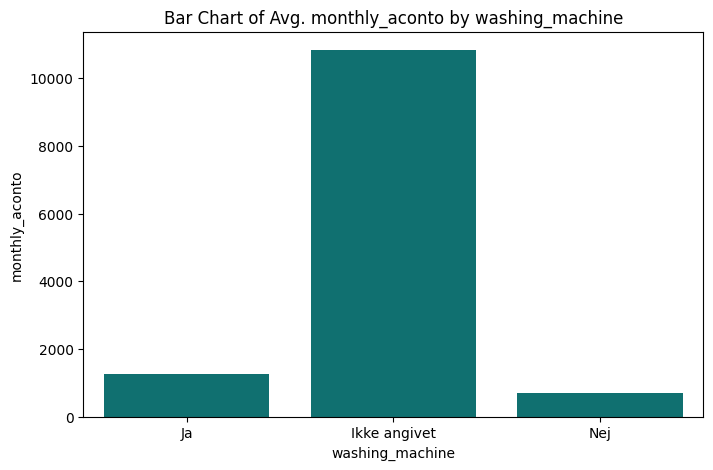

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_36277/756177244.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=var, data=df, ci=None, color='teal')


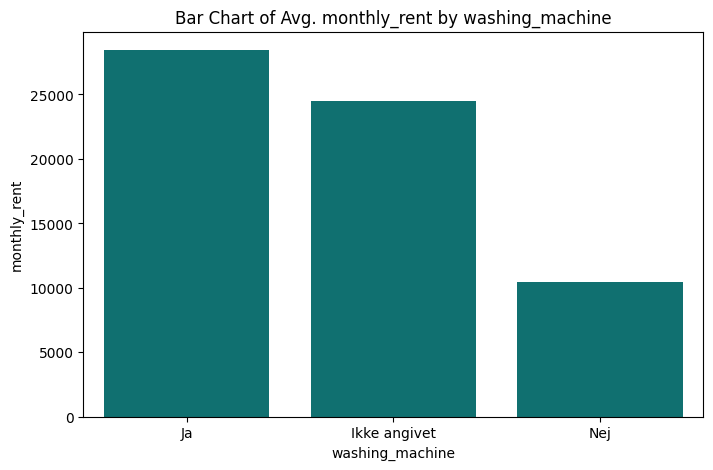

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_36277/756177244.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=var, data=df, ci=None, color='teal')


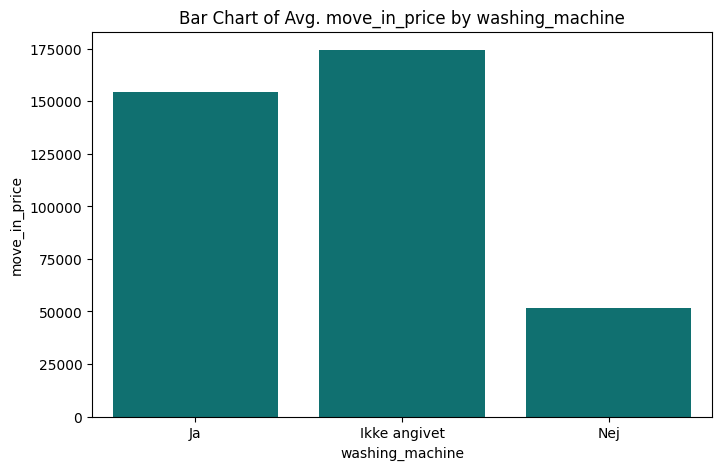

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_36277/756177244.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=var, data=df, ci=None, color='teal')


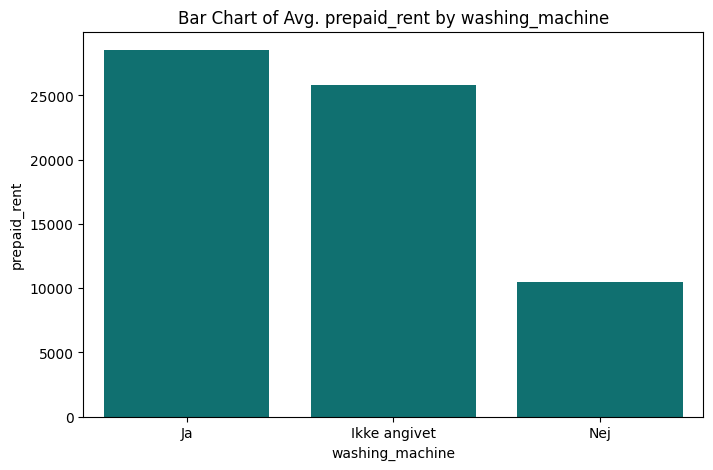

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_36277/756177244.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=var, data=df, ci=None, color='teal')


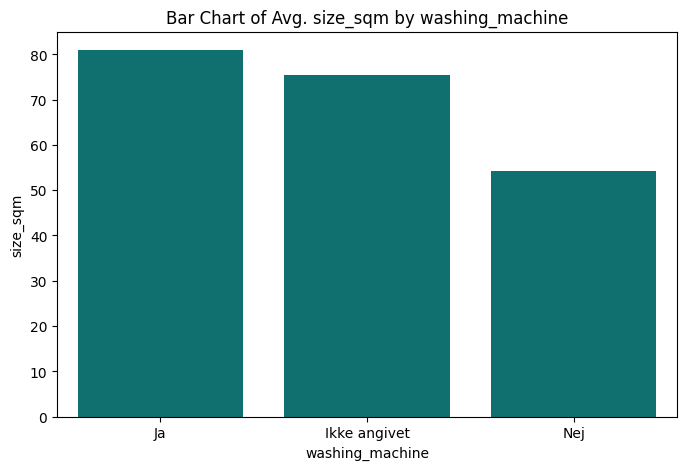

In [ ]:
# 5. Bar charts of continuous variables by discrete variables
discrete_var = 'washing_machine'  # Assuming 'C' is a discrete variable
continuous_vars = df.select_dtypes(include=['float64']).columns.difference([discrete_var])

# Creating bar charts
for var in continuous_vars:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=discrete_var, y=var, data=df, ci=None, color='teal')
    plt.title(f'Bar Chart of Avg. {var} by {discrete_var}')
    plt.xlabel(discrete_var)
    plt.ylabel(var)
    plt.show()

In [35]:
df.head()

,monthly_rent,monthly_aconto,move_in_price,housing_type,size_sqm,rooms,floor,furnished,roommate_friendly,pets_allowed,...,parking,dishwasher,washing_machine,charging_station,dryer,deposit,prepaid_rent,energy_mark,area,availability_in
0,12850.0,1350.0,52750.0,Lejlighed,86.0,3,3,Ja,Nej,Nej,...,Nej,Ikke angivet,Ja,Ikke angivet,Ikke angivet,38550.0,0.0,D,Frederiksberg C,<1 month
1,15700.0,1224.0,79724.0,Lejlighed,113.0,4,4,Nej,Nej,Ja,...,Ja,Ja,Ja,Nej,Ja,47100.0,15700.0,A15,Bagsværd,1-3 months
2,5000.0,1000.0,21000.0,Værelse,9.0,1,0,Ja,Ja,Nej,...,Ja,Ikke angivet,Ja,Ikke angivet,Ja,15000.0,0.0,A20,Kastrup,1-3 months
3,3500.0,500.0,11500.0,Værelse,14.0,1,0,Ja,Ja,Nej,...,Ja,Nej,Ja,Nej,Ja,4000.0,3500.0,C,København S,1-3 months
4,4650.0,0.0,13950.0,Værelse,7.0,1,4,Ja,Nej,Nej,...,Nej,Ikke angivet,Ikke angivet,Ikke angivet,Ikke angivet,9300.0,0.0,none,København V,<1 month


### Attempt with the log transformed variables

We were familiar with a technique to have more interpretable results, which is to transform the data with a function, in this case the log works for us, as the data has a long tail and contains outliers, so applying a log transformation to the variables helps normalize the distribution and make the histograms more interpretable.

In [59]:
for var in continuous_ratio_vars:
    if var!='size_sqm':
        df[f'{var}_log'] = np.log1p(df[var])

In [60]:
continuous_ratio_log_vars = [col for col in df.select_dtypes(include=['float64']).columns.tolist() if ('log' in col or col=='size_sqm')]

In [61]:
# 1. Quick Summary Statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       monthly_rent  monthly_aconto  move_in_price     size_sqm        rooms  \
count  1.897000e+03     1897.000000   1.897000e+03  1897.000000  1897.000000   
mean   2.520094e+04     3655.044280   1.466363e+05    76.227728     2.548761   
std    1.283260e+05    16633.153629   7.738691e+05    41.518307     1.221239   
min    3.127000e+03        0.000000   0.000000e+00     6.000000     1.000000   
25%    9.750000e+03      505.000000   4.155000e+04    43.000000     1.000000   
50%    1.250000e+04      800.000000   6.070000e+04    80.000000     3.000000   
75%    1.550000e+04     1100.000000   7.622000e+04    98.000000     3.000000   
max    1.758802e+06   196000.000000   1.199687e+07   330.000000     8.000000   

             floor       deposit  prepaid_rent  monthly_rent_log  \
count  1897.000000  1.897000e+03  1.897000e+03       1897.000000   
mean      2.316816  6.675870e+04  2.560223e+04          9.446429   
std       2.348646  3.524395e+05  1.661124e+05         

In [62]:
# 2. Correlation Matrix for the numerical variables
correlation_matrix = df[continuous_ratio_log_vars].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                    size_sqm  monthly_rent_log  monthly_aconto_log  \
size_sqm            1.000000          0.668851            0.472062   
monthly_rent_log    0.668851          1.000000            0.369177   
monthly_aconto_log  0.472062          0.369177            1.000000   
move_in_price_log   0.427465          0.556905            0.206806   
deposit_log         0.536755          0.675625            0.491579   
prepaid_rent_log    0.171049          0.206039            0.239021   

                    move_in_price_log  deposit_log  prepaid_rent_log  
size_sqm                     0.427465     0.536755          0.171049  
monthly_rent_log             0.556905     0.675625          0.206039  
monthly_aconto_log           0.206806     0.491579          0.239021  
move_in_price_log            1.000000     0.457934          0.197354  
deposit_log                  0.457934     1.000000          0.250916  
prepaid_rent_log             0.197354     0.250916          1.

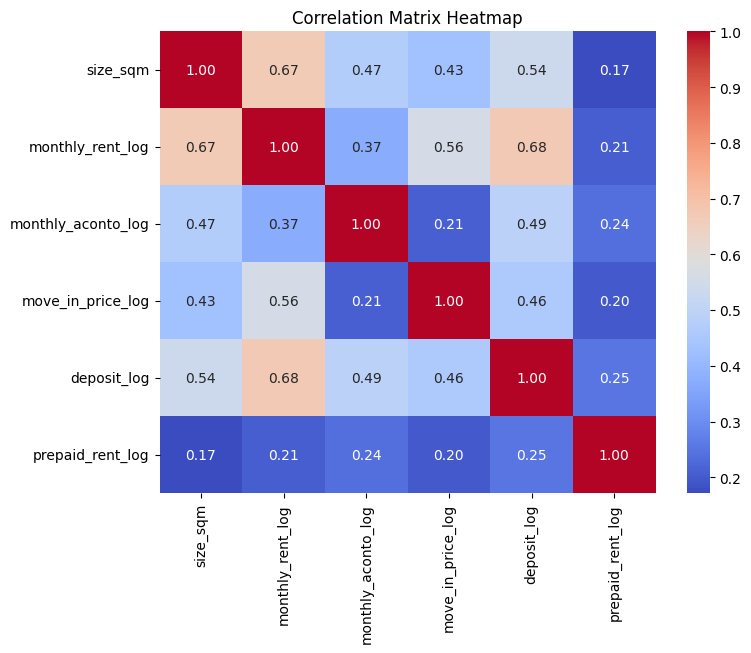

In [63]:
# 3. Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

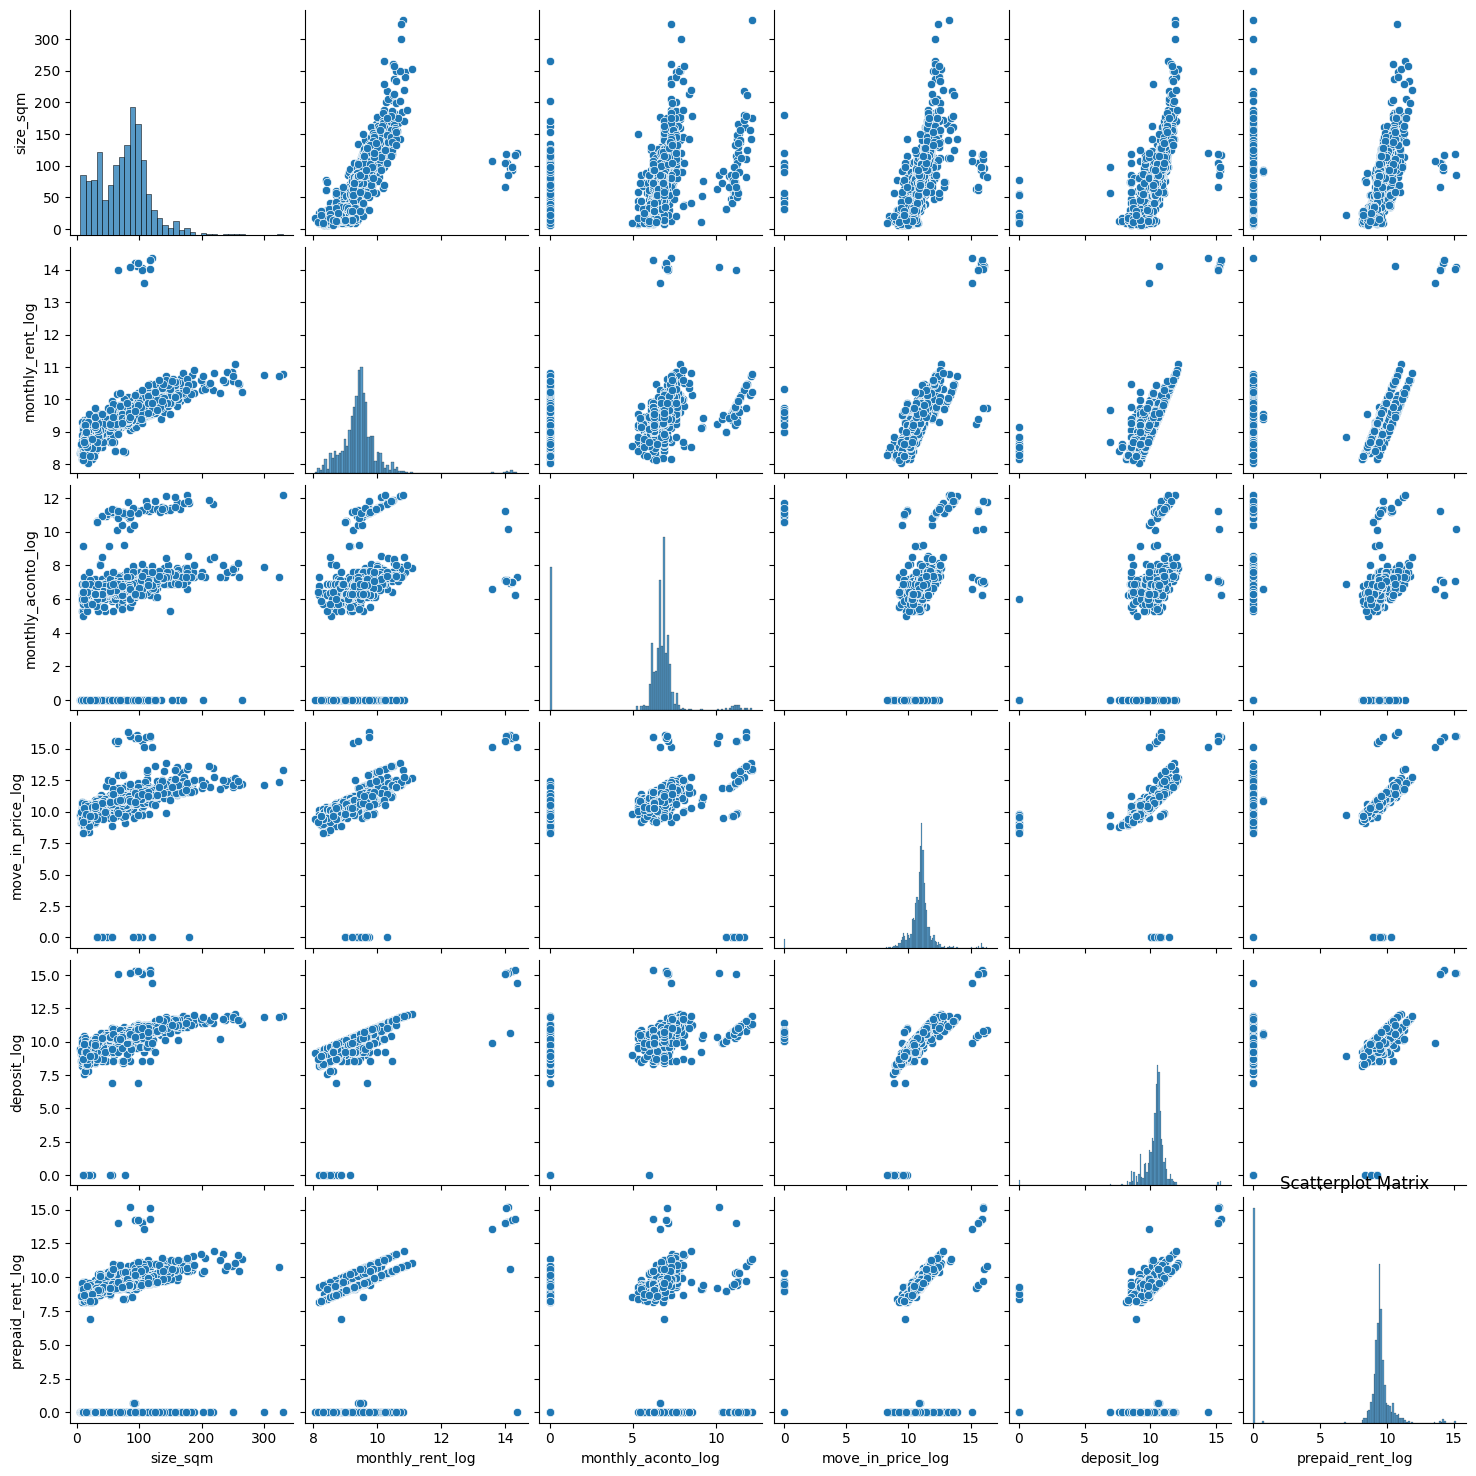

In [64]:
# 4. Scatterplot Matrix with Histograms (only continuous ratio variables)
sns.pairplot(df[continuous_ratio_log_vars])
plt.title('Scatterplot Matrix')
plt.show()

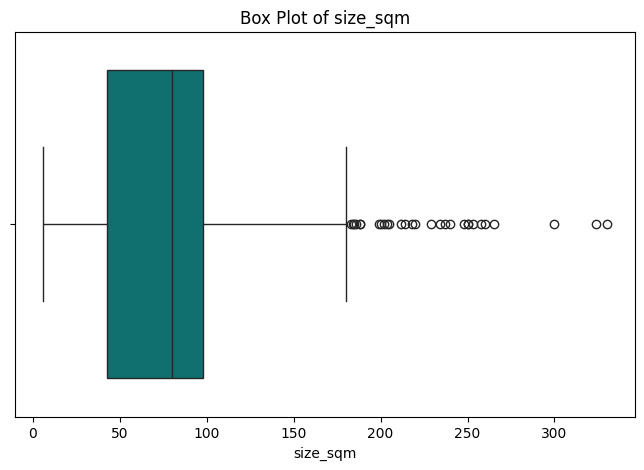

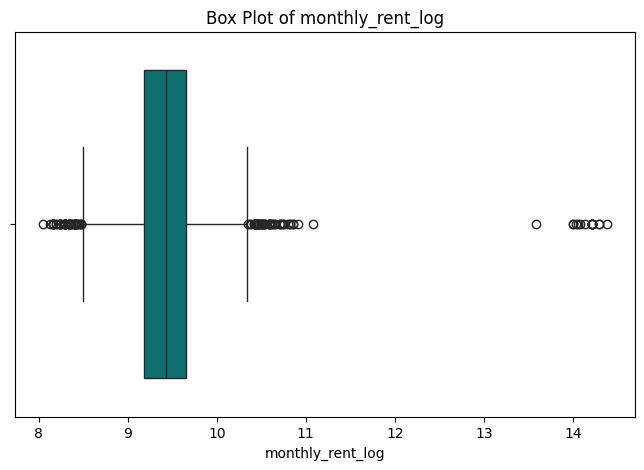

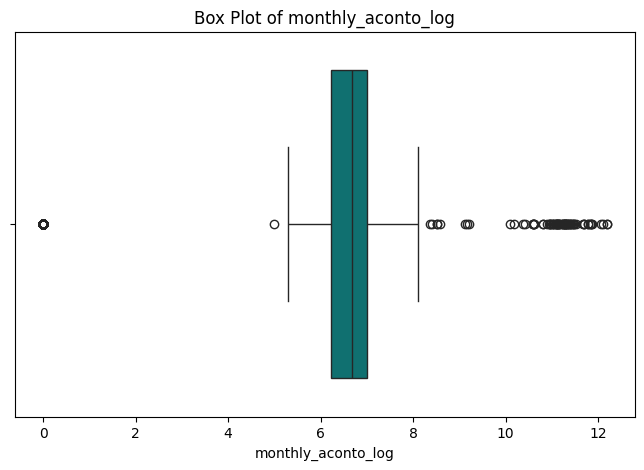

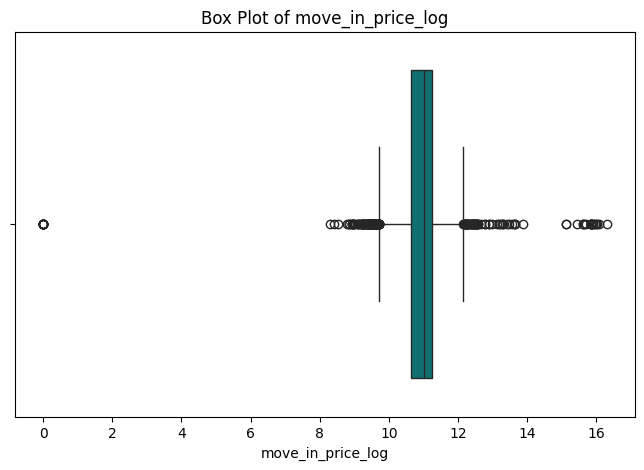

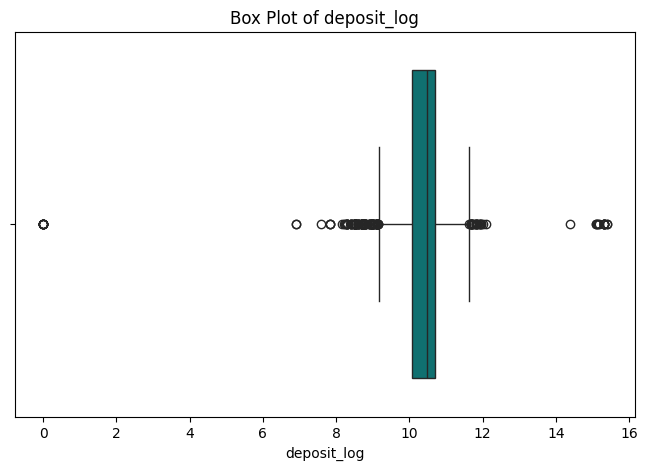

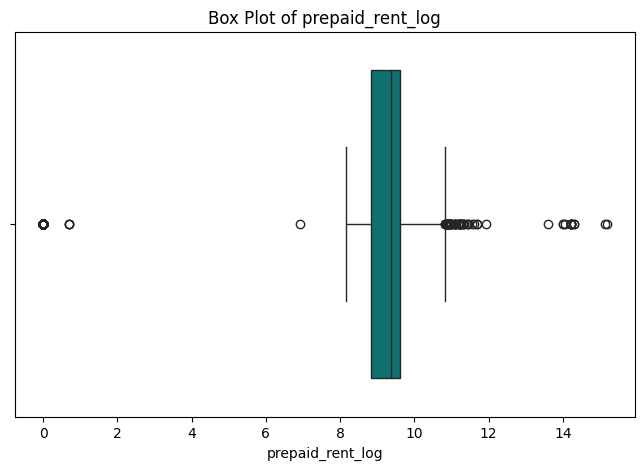

In [76]:
for var in continuous_ratio_log_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[var], color='teal')
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.show()

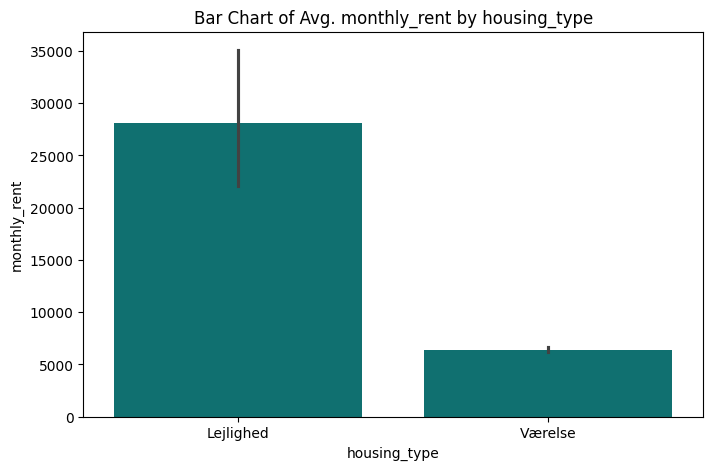

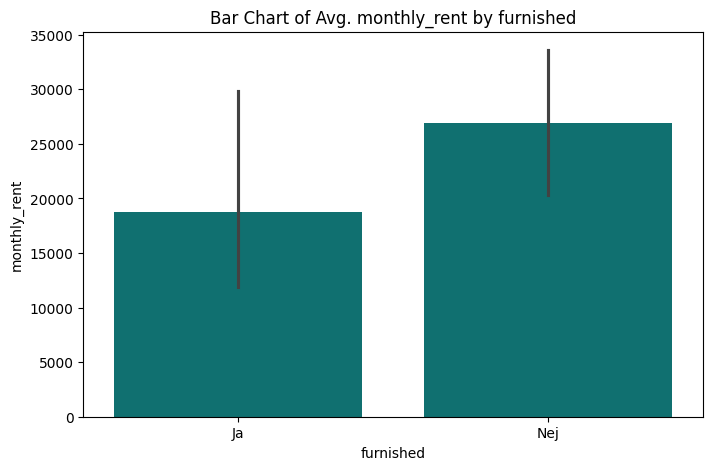

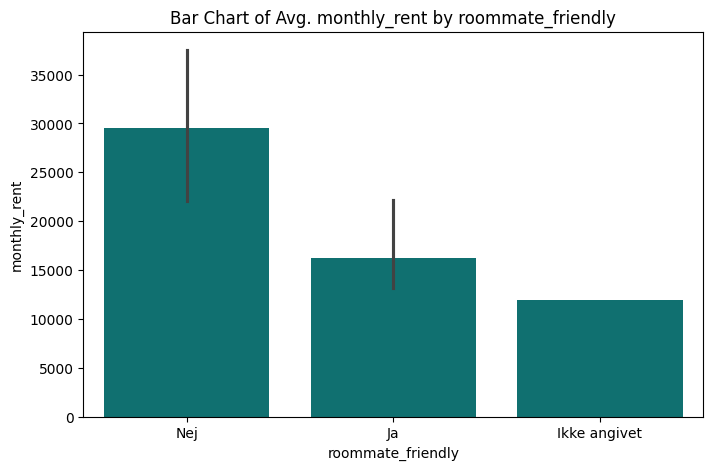

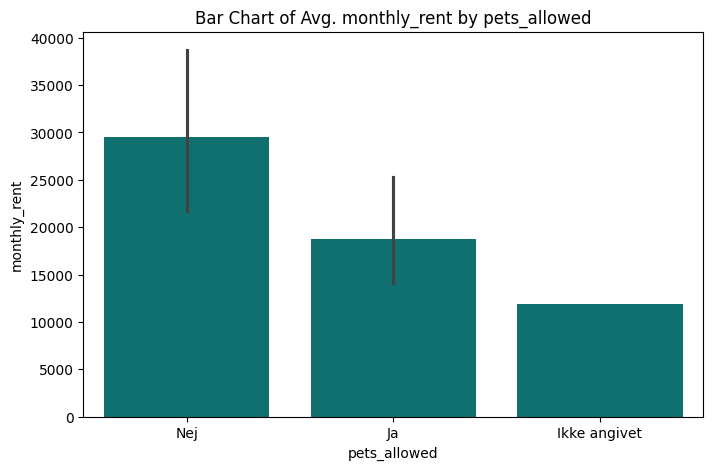

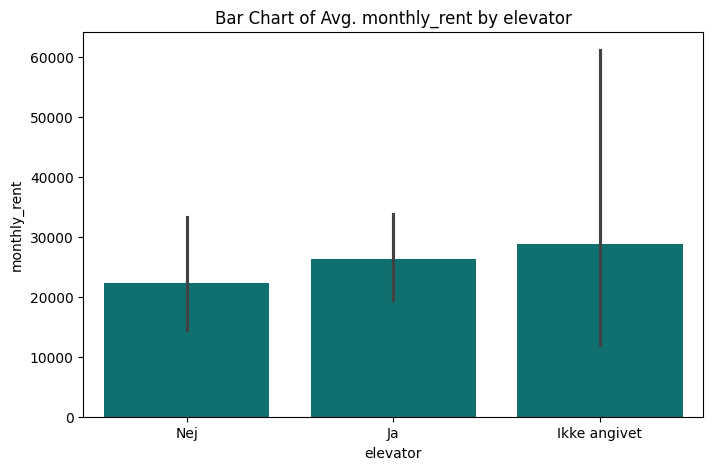

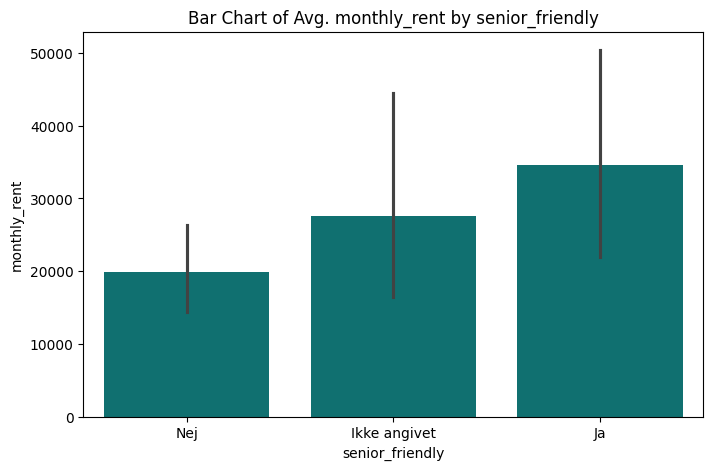

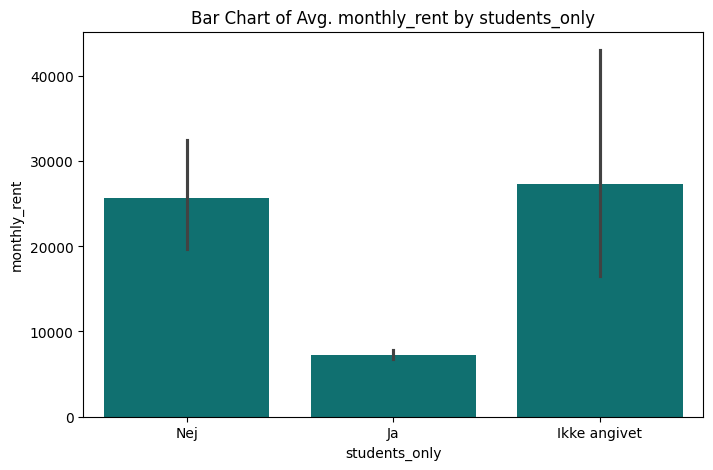

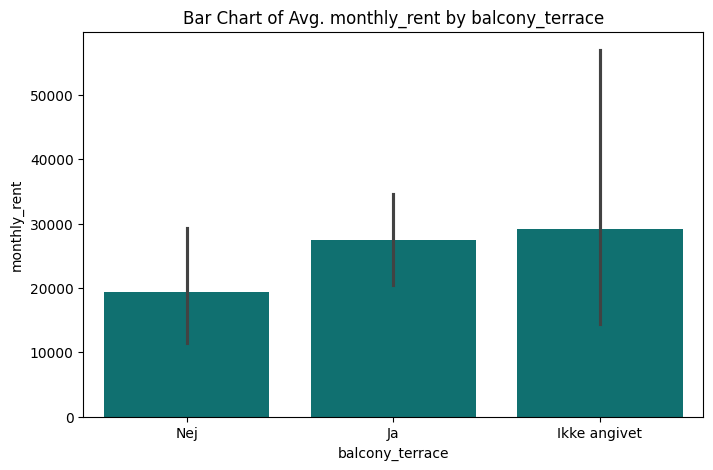

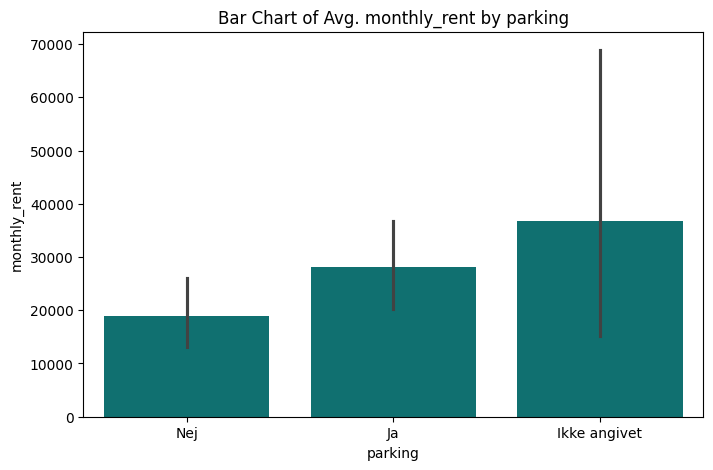

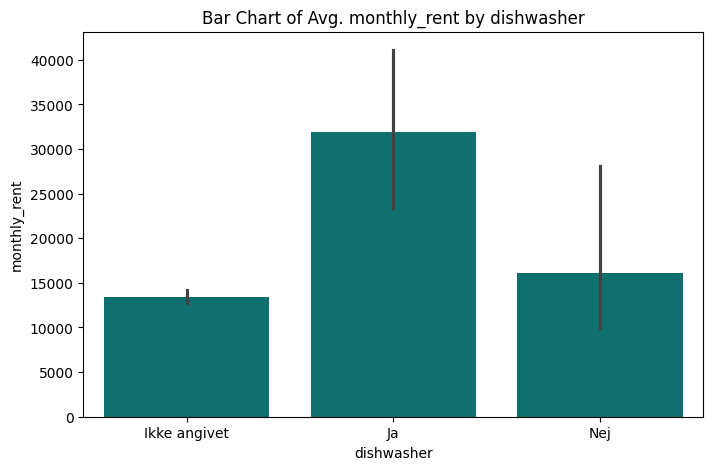

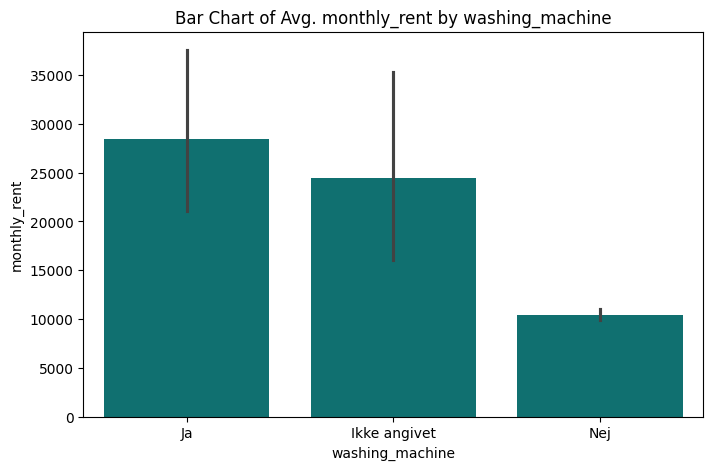

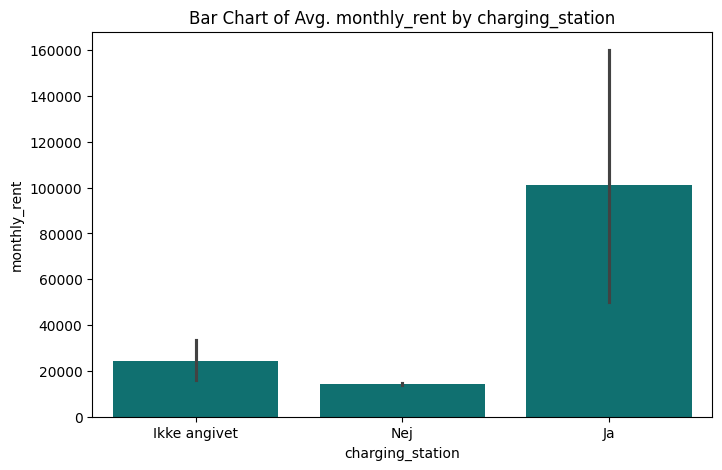

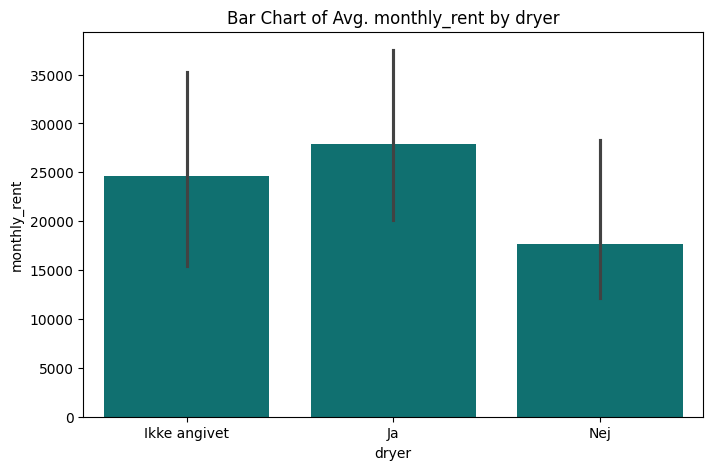

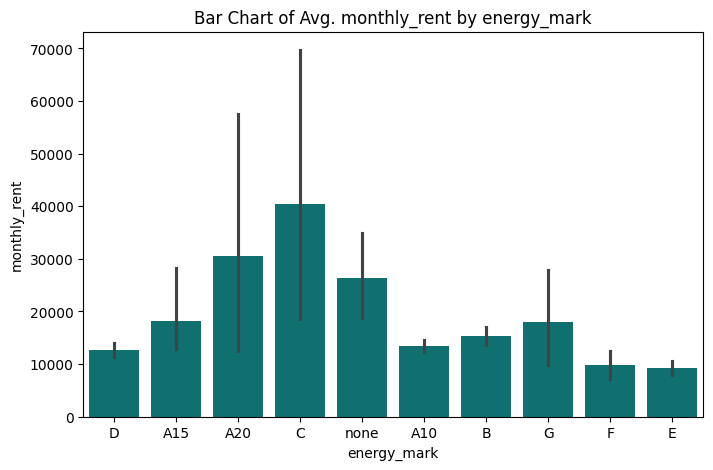

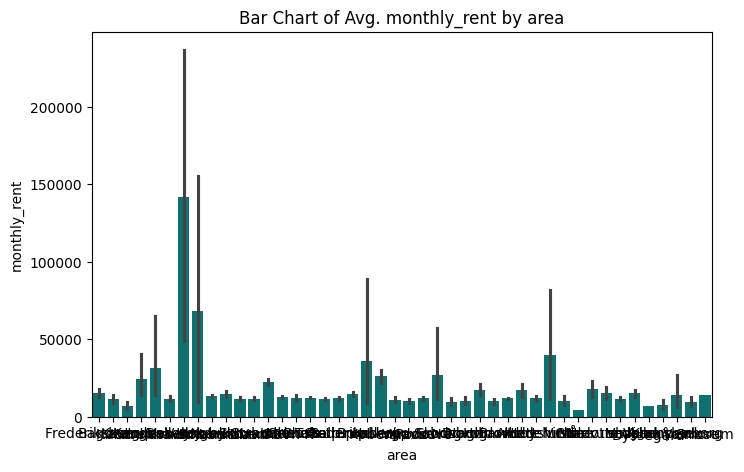

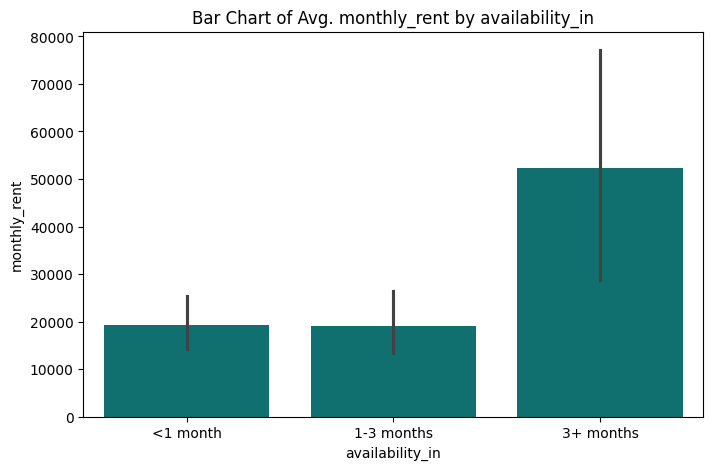

In [75]:
# 5. Bar charts of continuous variables by discrete variables
discrete_vars = df.select_dtypes(include=['object']).columns.tolist() 
continuous_var = 'monthly_rent' # We choose only the dependent variable we later want to predict

# Creating bar charts
for discrete_var in discrete_vars:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=discrete_var, y=continuous_var, data=df, color='teal')
    plt.title(f'Bar Chart of Avg. {continuous_var} by {discrete_var}')
    plt.xlabel(discrete_var)
    plt.ylabel(continuous_var)
    plt.show()

In [79]:
df1 = df.drop(columns=[col for col in continuous_ratio_vars if col!='size_sqm'])

In [82]:
df1.to_csv('preprocessed_log_data.csv', index=False, header=True, encoding='utf-8')